In [1]:
import pandas as pd
import numpy as np

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("D:/ESAA/project/data/movies_metadata.csv")

C:\ProgramData\Anaconda3\envs\testtest\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 1. adult
False인 관측치만 냅두고 나머지는 다 제거함

In [3]:
pd.value_counts(data["adult"])

False                                                                                                                             45454
True                                                                                                                                  9
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 - Written by Ørnås                                                                                                                   1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [4]:
data=data[data["adult"]=="False"]

In [5]:
data[data["adult"]!="False"]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count


In [6]:
pd.value_counts(data["adult"])

False    45454
Name: adult, dtype: int64

# 2. belongs_to_collection
collection이 있는 관측치는 collection name만 뽑아서 저장.

In [7]:
data["belongs_to_collection"].describe()

count                                                  4491
unique                                                 1695
top       {'id': 415931, 'name': 'The Bowery Boys', 'pos...
freq                                                     29
Name: belongs_to_collection, dtype: object

In [8]:
data["belongs_to_collection"].notnull()

0         True
1        False
2         True
3        False
4         True
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: belongs_to_collection, Length: 45454, dtype: bool

In [9]:
data["belongs_to_collection"]

0        {'id': 10194, 'name': 'Toy Story Collection', ...
1                                                      NaN
2        {'id': 119050, 'name': 'Grumpy Old Men Collect...
3                                                      NaN
4        {'id': 96871, 'name': 'Father of the Bride Col...
                               ...                        
45461                                                  NaN
45462                                                  NaN
45463                                                  NaN
45464                                                  NaN
45465                                                  NaN
Name: belongs_to_collection, Length: 45454, dtype: object

In [10]:
type(data["belongs_to_collection"][0])

str

In [11]:
type(data["belongs_to_collection"][1])

float

In [12]:
collection=[]
for string in data["belongs_to_collection"]:
    if type(string)==float:
        collection.append(float("Nan"))
    else:
        col_dict=eval(string)
        collection.append(col_dict["name"])

In [13]:
collection[0:20]

['Toy Story Collection',
 nan,
 'Grumpy Old Men Collection',
 nan,
 'Father of the Bride Collection',
 nan,
 nan,
 nan,
 nan,
 'James Bond Collection',
 nan,
 nan,
 'Balto Collection',
 nan,
 nan,
 nan,
 nan,
 nan,
 'Ace Ventura Collection',
 nan]

In [14]:
data["belongs_to_collection"]=collection

In [15]:
data["belongs_to_collection"]

0                  Toy Story Collection
1                                   NaN
2             Grumpy Old Men Collection
3                                   NaN
4        Father of the Bride Collection
                      ...              
45461                               NaN
45462                               NaN
45463                               NaN
45464                               NaN
45465                               NaN
Name: belongs_to_collection, Length: 45454, dtype: object

# 3. budget
type을 flaot으로 변경

In [16]:
data["budget"].describe()

count     45454
unique     1223
top           0
freq      36565
Name: budget, dtype: object

In [17]:
data["budget"]=pd.to_numeric(data["budget"])

In [18]:
data["budget"].describe()

count    4.545400e+04
mean     4.225399e+06
std      1.742576e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+08
Name: budget, dtype: float64

# 4. genres
genres name만 포함하는 리스트 형태로 저장

In [19]:
data["genres"].describe()

count                             45454
unique                             4066
top       [{'id': 18, 'name': 'Drama'}]
freq                               5000
Name: genres, dtype: object

In [20]:
data["genres"]

0        [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1        [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2        [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3        [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                           [{'id': 35, 'name': 'Comedy'}]
                               ...                        
45461    [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...
45462                        [{'id': 18, 'name': 'Drama'}]
45463    [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...
45464                                                   []
45465                                                   []
Name: genres, Length: 45454, dtype: object

In [21]:
data["genres"][0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [22]:
data["genres"][45464]

'[]'

In [23]:
eval(data["genres"][0])

[{'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 10751, 'name': 'Family'}]

In [24]:
genres=[]
for string in data["genres"]:
    genres_list=eval(string)
    if len(genres_list)==0:
        genres.append(float("Nan"))
    else:
        genres2=[]
        for genres_dict in genres_list:
            genres_name=genres_dict["name"]
            genres2.append(genres_name)
        genres.append(genres2)

In [25]:
genres[0:20]

[['Animation', 'Comedy', 'Family'],
 ['Adventure', 'Fantasy', 'Family'],
 ['Romance', 'Comedy'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy'],
 ['Action', 'Crime', 'Drama', 'Thriller'],
 ['Comedy', 'Romance'],
 ['Action', 'Adventure', 'Drama', 'Family'],
 ['Action', 'Adventure', 'Thriller'],
 ['Adventure', 'Action', 'Thriller'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy', 'Horror'],
 ['Family', 'Animation', 'Adventure'],
 ['History', 'Drama'],
 ['Action', 'Adventure'],
 ['Drama', 'Crime'],
 ['Drama', 'Romance'],
 ['Crime', 'Comedy'],
 ['Crime', 'Comedy', 'Adventure'],
 ['Action', 'Comedy', 'Crime']]

In [26]:
data["genres"]=genres

In [27]:
data["genres"]

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2                   [Romance, Comedy]
3            [Comedy, Drama, Romance]
4                            [Comedy]
                     ...             
45461                 [Drama, Family]
45462                         [Drama]
45463       [Action, Drama, Thriller]
45464                             NaN
45465                             NaN
Name: genres, Length: 45454, dtype: object

# 5. homepage
변수 삭제

In [28]:
data["homepage"]

0        http://toystory.disney.com/toy-story
1                                         NaN
2                                         NaN
3                                         NaN
4                                         NaN
                         ...                 
45461    http://www.imdb.com/title/tt6209470/
45462                                     NaN
45463                                     NaN
45464                                     NaN
45465                                     NaN
Name: homepage, Length: 45454, dtype: object

In [29]:
del data["homepage"]

In [30]:
data.head()

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,Toy Story Collection,30000000,"[Animation, Comedy, Family]",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,Grumpy Old Men Collection,0,"[Romance, Comedy]",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[Comedy, Drama, Romance]",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,Father of the Bride Collection,0,[Comedy],11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


# 6. id
type를 object에서 int로 변경 후 
같은 값 갖는 관측치는 하나만 남겨놓고 삭제

In [31]:
data["id"].describe()

count      45454
unique     45424
top       141971
freq           3
Name: id, dtype: object

In [32]:
data["id"]=pd.to_numeric(data["id"],errors='coerce')

In [33]:
pd.value_counts(data["id"])

141971    3
22649     2
12600     2
109962    2
14788     2
         ..
376934    1
86751     1
19164     1
29403     1
276895    1
Name: id, Length: 45424, dtype: int64

In [34]:
data[data["id"]==141971]

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
13261,False,NaN,0,"[Thriller, Mystery]",141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,0.411949,...,2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0
13375,False,NaN,0,"[Thriller, Mystery]",141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,0.411949,...,2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0
16764,False,NaN,0,"[Thriller, Mystery]",141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,0.411949,...,2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0


In [35]:
data=data.drop_duplicates(["id"],keep="first")

In [36]:
pd.value_counts(data["id"])

2047      1
46492     1
38264     1
327029    1
62836     1
         ..
33765     1
176867    1
376934    1
86751     1
276895    1
Name: id, Length: 45424, dtype: int64

In [37]:
np.sum(data.duplicated(["id"]))

0

# 7. imdb_id
기존에 존재하던 중복행은 위의 전처리 과정들에서 모두 해결

영화별 고유값같은데 이미 id가 그 역할 해주고 있으니깐 그냥 제거

In [38]:
data["imdb_id"].describe()

count         45407
unique        45407
top       tt4393278
freq              1
Name: imdb_id, dtype: object

In [39]:
np.sum(pd.value_counts(data["imdb_id"])>1)

0

In [40]:
del data["imdb_id"]

In [41]:
data.head()

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,poster_path,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,Toy Story Collection,30000000,"[Animation, Comedy, Family]",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,Grumpy Old Men Collection,0,"[Romance, Comedy]",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[Comedy, Drama, Romance]",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,Father of the Bride Collection,0,[Comedy],11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


# 8. original_language
모든 변수 전처리 끝난 후에 영어 영화만 따로 모은 데이터 추출 예정

Nan인 애들은 뒤에 spoken_language 변수 정리할때 다시 처리

In [42]:
data["original_language"].describe()

count     45413
unique       89
top          en
freq      32246
Name: original_language, dtype: object

In [43]:
pd.value_counts(data["original_language"])

en    32246
fr     2436
it     1528
ja     1347
de     1079
      ...  
lb        1
rw        1
la        1
qu        1
jv        1
Name: original_language, Length: 89, dtype: int64

In [44]:
np.sum(pd.isnull(data["original_language"]))

11

In [45]:
data[pd.isnull(data["original_language"])==True]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,poster_path,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19574,False,NaN,0,[Documentary],283101,NaN,Shadowing the Third Man,Documentary about the production of The Third ...,0.017007,/xT9csxMKYbizRQgvNzCXJ67R7er.jpg,...,2004-10-11,0.0,95.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,NaN,Shadowing the Third Man,False,0.0,0.0
21602,False,NaN,0,"[Romance, Drama]",103902,NaN,Unfinished Sky,An Outback farmer takes in an Afghani woman wh...,0.359818,/vfaJuZF0ocVwBEDYZhoULGuVxrz.jpg,...,2007-08-04,0.0,94.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Unfinished Sky,False,6.4,8.0
22832,False,NaN,0,"[War, Western]",359195,NaN,13 Fighting Men,A group of Union Army soldiers is charged with...,0.070647,/q5ADXvvzYtAOyrReIg1HckdPj62.jpg,...,1960-03-31,0.0,69.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,13 Fighting Men,False,0.0,0.0
32141,False,NaN,0,[Comedy],147050,NaN,Lambchops,George and Gracie enter an elegant drawing roo...,0.073418,/upQByEwY58sHWdL3RZm7kmRc44s.jpg,...,1929-10-31,0.0,8.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Lambchops,False,6.5,2.0
37407,False,NaN,0,[Animation],257095,NaN,Bajaja,The first fairy tale transformed into a full-l...,0.036841,/12wf2EkrPGxNzRbNyoau8GIFp3M.jpg,...,1950-01-26,0.0,87.0,"[{'iso_639_1': 'cs', 'name': 'Český'}]",Released,NaN,Prince Bayaya,False,5.0,1.0
41047,False,NaN,0,[Documentary],332742,NaN,Song of Lahore,"Until the late 1970s, the Pakistani city of La...",0.373688,/6iJqscs2xQLKKvrTCWmlHd9rf3W.jpg,...,2015-11-13,0.0,82.0,"[{'iso_639_1': 'ur', 'name': 'اردو'}, {'iso_63...",Released,NaN,Song of Lahore,False,6.5,2.0
41872,False,NaN,0,[Documentary],144410,NaN,Annabelle Serpentine Dance,Two dancers perform in succession facing a sta...,1.58434,/l7Lzvah6PL6vdMF5p0elKiyYqp9.jpg,...,1895-04-01,0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Annabelle Serpentine Dance,False,5.7,20.0
44057,False,NaN,0,[Drama],380438,NaN,Lettre d'une inconnue,NaN,0.001283,/gk32ZWTYgfTXctEyCDAWeMcxo7X.jpg,...,2001-01-01,0.0,0.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Lettre d'une inconnue,False,0.0,0.0
44410,False,NaN,0,"[Animation, Documentary]",381096,NaN,Garn,The traditional crafts of crochet and knitting...,0.067624,/olEOCEGTW15WBPC0UnmLjokrmNF.jpg,...,2016-03-12,0.0,76.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}, {'iso...",Released,NaN,Yarn,False,0.0,0.0
44576,False,NaN,0,NaN,381525,NaN,WiNWiN,American investment fund buys Austrian compani...,0.030766,/pErCRQoc3nt8lCsExd3fFYgyBox.jpg,...,2016-01-27,0.0,84.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,NaN,WiNWiN,False,0.0,0.0


우선 냅두고 넘어간 다음에 뒤에가서 지정해줄게요!

# 9. original_title

In [46]:
data["original_title"].describe()

count      45424
unique     43363
top       Hamlet
freq           8
Name: original_title, dtype: object

In [47]:
pd.value_counts(data["original_title"])

Hamlet                         8
Alice in Wonderland            8
The Three Musketeers           7
A Christmas Carol              7
Macbeth                        7
                              ..
The Thing That Couldn't Die    1
Memórias Póstumas              1
Mad Dog Morgan                 1
Bringing Up Bobby              1
鮫肌男と桃尻女                        1
Name: original_title, Length: 43363, dtype: int64

In [48]:
data[data["original_title"]=="Alice in Wonderland"]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,poster_path,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
1003,False,NaN,3000000,"[Animation, Adventure, Family, Fantasy]",12092,en,Alice in Wonderland,"On a golden afternoon, young Alice follows a W...",16.4889,/9gJa2B6M8jt85aDkb0MF98MLZ9T.jpg,...,1951-07-03,5.720000e+08,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A world of wonders in One Great Picture,Alice in Wonderland,False,7.0,1557.0
9665,False,NaN,21000000,"[Fantasy, Family]",30923,en,Alice in Wonderland,Alice follows a white rabbit down a rabbit-hol...,8.6143,/c53p3QRI0BNx7KE1zH8fXoWq4sM.jpg,...,1999-02-28,0.000000e+00,150.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Masterpiece of Imagination...,Alice in Wonderland,False,6.1,71.0
11887,False,NaN,14000000,"[Family, Fantasy]",34573,en,Alice in Wonderland,Classic tale of a girl named Alice who follows...,3.79413,/1jlw8lSaLetDP4XqioTgK6R38Lt.jpg,...,1985-12-09,0.000000e+00,187.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Alice in Wonderland,False,6.3,15.0
14892,False,Alice in Wonderland Collection,200000000,"[Family, Fantasy, Adventure]",12155,en,Alice in Wonderland,"Alice, an unpretentious and individual 19-year...",17.2851,/pvEE5EN5N1yjmHmldfL4aJWm56l.jpg,...,2010-03-03,1.025491e+09,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,You're invited to a very important date.,Alice in Wonderland,False,6.4,4773.0
15868,False,NaN,0,"[Action, Adventure, Family, Fantasy, Science F...",25694,en,Alice in Wonderland,"On a boring winter afternoon, Alice dreams, th...",1.50435,/hA536GMozYb9zbMjo2NqESniveU.jpg,...,1933-12-22,0.000000e+00,76.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Entertainment Miracle Of All Times!,Alice in Wonderland,False,5.4,8.0
26894,False,NaN,0,"[Family, Fantasy, Science Fiction]",35109,en,Alice in Wonderland,Alice in Wonderland (1966) is a BBC television...,1.71604,/dWnbHEZ31kMOx8cnN7IvG3fBpwp.jpg,...,1966-12-26,0.000000e+00,72.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Alice in Wonderland,False,6.9,8.0
32901,False,NaN,0,"[Family, Fantasy]",87300,en,Alice in Wonderland,A German adaptation of the classic Lewis Carro...,0.140291,/9YJqY2MWOUzy60iMhniOF4NEZRs.jpg,...,1915-01-15,0.000000e+00,52.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Alice in Wonderland,False,5.5,2.0
39530,False,NaN,0,[Fantasy],41278,en,Alice in Wonderland,This is the first movie version of the famous ...,0.708323,/rATc0e78ORRmJyvgqAywkejdgqh.jpg,...,1903-10-17,0.000000e+00,9.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Alice in Wonderland,False,6.1,20.0


위에서 중복행은 제거해줬기 때문에 같은 제목으로 나오는 영화들은 모두 다른 영화

# 10. overview

In [49]:
data["overview"].describe()

count                  44470
unique                 44297
top       No overview found.
freq                     133
Name: overview, dtype: object

In [50]:
data["overview"].value_counts()

No overview found.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               133
No Overview                                                                                                                                                                                                                                                                                                                                                                                        

In [51]:
text_counts = data["overview"].value_counts()
text_list = text_counts[text_counts > 1].index.tolist()

In [52]:
text_list

['No overview found.',
 'No Overview',
 ' ',
 'No movie overview available.',
 'A few funny little novels about different aspects of life.',
 'Adaptation of the Jane Austen novel.',
 'Funny, entertaining comedy with a few storylines. All of them have one thing in common - a resort town of Rimini in Italy.',
 "King Lear, old and tired, divides his kingdom among his daughters, giving great importance to their protestations of love for him. When Cordelia, youngest and most honest, refuses to idly flatter the old man in return for favor, he banishes her and turns for support to his remaining daughters. But Goneril and Regan have no love for him and instead plot to take all his power from him. In a parallel, Lear's loyal courtier Gloucester favors his illegitimate son Edmund after being told lies about his faithful son Edgar. Madness and tragedy befall both ill-starred fathers.",
 'A Russian engineer Petr Garin possesses a unique beam-shooting weapon that can destroy any target. His goal is

In [53]:
overview_list=[]
for overview in data["overview"]:
    if overview=="No overview found.":
        overview_list.append("")
    elif overview=="No Overview":
        overview_list.append("")
    elif overview==" ":
        overview_list.append("")
    elif overview=="No movie overview available.":
        overview_list.append("")
    else:
        overview_list.append(overview)

In [54]:
data["overview"]=overview_list

In [55]:
data["overview"]

0        Led by Woody, Andy's toys live happily in his ...
1        When siblings Judy and Peter discover an encha...
2        A family wedding reignites the ancient feud be...
3        Cheated on, mistreated and stepped on, the wom...
4        Just when George Banks has recovered from his ...
                               ...                        
45461          Rising and falling between a man and woman.
45462    An artist struggles to finish his work while a...
45463    When one of her hits goes wrong, a professiona...
45464    In a small town live two brothers, one a minis...
45465    50 years after decriminalisation of homosexual...
Name: overview, Length: 45424, dtype: object

# 11. popularity
type을 object에서 numeric으로 변환

In [56]:
data["popularity"].describe()

count     45421
unique    44149
top         0.0
freq         34
Name: popularity, dtype: object

In [57]:
data["popularity"]=pd.to_numeric(data["popularity"],errors='coerce')

In [58]:
data["popularity"].describe()

count    45421.000000
mean         2.921493
std          6.007204
min          0.000000
25%          0.385850
50%          1.127098
75%          3.678394
max        547.488298
Name: popularity, dtype: float64

# 12. poster_path
제거

In [59]:
del data["poster_path"]

In [60]:
data.head()

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,Toy Story Collection,30000000,"[Animation, Comedy, Family]",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,Grumpy Old Men Collection,0,"[Romance, Comedy]",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[Comedy, Drama, Romance]",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,Father of the Bride Collection,0,[Comedy],11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


# 13. production_companies

In [61]:
data["production_companies"].describe()

count     45421
unique    22704
top          []
freq      11865
Name: production_companies, dtype: object

In [62]:
data["production_companies"]

0           [{'name': 'Pixar Animation Studios', 'id': 3}]
1        [{'name': 'TriStar Pictures', 'id': 559}, {'na...
2        [{'name': 'Warner Bros.', 'id': 6194}, {'name'...
3        [{'name': 'Twentieth Century Fox Film Corporat...
4        [{'name': 'Sandollar Productions', 'id': 5842}...
                               ...                        
45461                                                   []
45462               [{'name': 'Sine Olivia', 'id': 19653}]
45463    [{'name': 'American World Pictures', 'id': 6165}]
45464                 [{'name': 'Yermoliev', 'id': 88753}]
45465                                                   []
Name: production_companies, Length: 45424, dtype: object

In [63]:
companies=[]
for string in data["production_companies"]:
    if type(string)==float:
        companies.append(float("Nan"))
    else:
        companies_list=eval(string)
        if len(companies_list)==0:
            companies.append(float("Nan"))
        else:
            companies2=[]
            for companies_dict in companies_list:
                companies_name=companies_dict["name"]
                companies2.append(companies_name)
            companies.append(companies2)

In [64]:
data["production_companies"]=companies

In [65]:
data["production_companies"]

0                                [Pixar Animation Studios]
1        [TriStar Pictures, Teitler Film, Interscope Co...
2                           [Warner Bros., Lancaster Gate]
3                 [Twentieth Century Fox Film Corporation]
4             [Sandollar Productions, Touchstone Pictures]
                               ...                        
45461                                                  NaN
45462                                        [Sine Olivia]
45463                            [American World Pictures]
45464                                          [Yermoliev]
45465                                                  NaN
Name: production_companies, Length: 45424, dtype: object

# 14. production_countries

In [66]:
data["production_countries"].describe()

count                                                 45421
unique                                                 2390
top       [{'iso_3166_1': 'US', 'name': 'United States o...
freq                                                  17838
Name: production_countries, dtype: object

In [67]:
data["production_countries"]

0        [{'iso_3166_1': 'US', 'name': 'United States o...
1        [{'iso_3166_1': 'US', 'name': 'United States o...
2        [{'iso_3166_1': 'US', 'name': 'United States o...
3        [{'iso_3166_1': 'US', 'name': 'United States o...
4        [{'iso_3166_1': 'US', 'name': 'United States o...
                               ...                        
45461               [{'iso_3166_1': 'IR', 'name': 'Iran'}]
45462        [{'iso_3166_1': 'PH', 'name': 'Philippines'}]
45463    [{'iso_3166_1': 'US', 'name': 'United States o...
45464             [{'iso_3166_1': 'RU', 'name': 'Russia'}]
45465     [{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]
Name: production_countries, Length: 45424, dtype: object

In [68]:
countries=[]
for string in data["production_countries"]:
    if type(string)==float:
        countries.append(float("Nan"))
    else:
        countries_list=eval(string)
        if len(countries_list)==0:
            countries.append(float("Nan"))
        else:
            countries2=[]
            for countries_dict in countries_list:
                countries_name=countries_dict["name"]
                countries2.append(countries_name)
            countries.append(countries2)

In [69]:
data["production_countries"]=countries

In [70]:
data["production_countries"]

0        [United States of America]
1        [United States of America]
2        [United States of America]
3        [United States of America]
4        [United States of America]
                    ...            
45461                        [Iran]
45462                 [Philippines]
45463    [United States of America]
45464                      [Russia]
45465              [United Kingdom]
Name: production_countries, Length: 45424, dtype: object

In [71]:
data["production_countries"].describe()

count                          39143
unique                          2389
top       [United States of America]
freq                           17838
Name: production_countries, dtype: object

# 15. release_date
datetime으로 변환

In [72]:
data["release_date"].describe()

count          45338
unique         17329
top       2008-01-01
freq             136
Name: release_date, dtype: object

In [73]:
from datetime import datetime

In [74]:
date=[]
for string in data["release_date"]:
    if type(string)!=str:
        date.append(float("Nan"))
    else:
        date.append(datetime.strptime(string, "%Y-%m-%d"))

In [75]:
data["release_date"]=date

In [76]:
data["release_date"]

0       1995-10-30
1       1995-12-15
2       1995-12-22
3       1995-12-22
4       1995-02-10
           ...    
45461          NaT
45462   2011-11-17
45463   2003-08-01
45464   1917-10-21
45465   2017-06-09
Name: release_date, Length: 45424, dtype: datetime64[ns]

# 16. revenue


In [77]:
data["revenue"].describe()

count    4.542100e+04
mean     1.121511e+07
std      6.435831e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64

In [78]:
np.sum(data["revenue"].isnull())

3

In [79]:
data[pd.isnull(data["revenue"])==True]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19729,False,NaN,0,"[Action, Thriller, Drama]",82663,en,Midnight Man,British soldiers force a recently captured IRA...,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29502,False,Mardock Scramble Collection,0,"[Animation, Science Fiction]",122662,ja,マルドゥック・スクランブル 排気,Third film of the Mardock Scramble series.,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35586,False,NaN,0,"[TV Movie, Action, Horror, Science Fiction]",249260,en,Avalanche Sharks,A group of skiers are terrorized during spring...,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 17. runtime

In [80]:
data["runtime"].describe()

count    45164.000000
mean        94.129196
std         38.413954
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

In [81]:
np.sum(pd.isnull(data["runtime"]))

260

In [82]:
data[pd.isnull(data["runtime"])==True]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
634,False,NaN,0,[Comedy],287305,de,Peanuts – Die Bank zahlt alles,NaN,0.066123,[Westdeutscher Rundfunk (WDR)],...,1996-03-21,0.0,NaN,[],Released,NaN,Peanuts – Die Bank zahlt alles,False,4.0,1.0
635,False,NaN,0,[Comedy],339428,de,Happy Weekend,NaN,0.002229,[Senator Film Produktion],...,1996-03-14,65335.0,NaN,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,NaN,Happy Weekend,False,0.0,0.0
644,False,NaN,0,[Drama],278978,de,Und keiner weint mir nach,NaN,0.439989,NaN,...,1996-02-29,0.0,NaN,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,NaN,Und keiner weint mir nach,False,0.0,0.0
802,False,NaN,0,[Drama],282919,de,Diebinnen,NaN,0.106345,NaN,...,1996-06-20,0.0,NaN,[],Released,NaN,Diebinnen,False,4.0,1.0
863,False,NaN,0,[Thriller],253632,fr,Baton Rouge,NaN,0.437895,NaN,...,1988-10-08,0.0,NaN,[],Released,NaN,Baton Rouge,False,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45246,False,NaN,0,[Comedy],231216,de,Villa Henriette,NaN,0.002513,NaN,...,2004-12-02,0.0,NaN,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,NaN,Villa Henriette,False,0.0,0.0
45310,False,NaN,0,NaN,418757,pl,Między nami dobrze jest,NaN,0.030803,NaN,...,2014-08-01,0.0,NaN,[],Released,NaN,Między nami dobrze jest,False,0.0,0.0
45313,False,NaN,0,[Drama],369444,pl,Ostatni dzwonek,NaN,0.000102,NaN,...,1989-10-27,0.0,NaN,[],Released,NaN,Ostatni dzwonek,False,0.0,0.0
45377,False,NaN,0,[Adventure],317389,es,Simbad e il califfo di Bagdad,NaN,0.006352,"[Roas Produzioni, Buton Film]",...,1973-07-22,0.0,NaN,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,NaN,Simbad e il califfo di Bagdad,False,0.0,0.0


# 18. spoken_languages

In [83]:
data["spoken_languages"].describe()

count                                        45421
unique                                        1931
top       [{'iso_639_1': 'en', 'name': 'English'}]
freq                                         22375
Name: spoken_languages, dtype: object

In [84]:
np.sum(pd.isnull(data["spoken_languages"]))

3

In [85]:
data[pd.isnull(data["spoken_languages"])==True]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19729,False,NaN,0,"[Action, Thriller, Drama]",82663,en,Midnight Man,British soldiers force a recently captured IRA...,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29502,False,Mardock Scramble Collection,0,"[Animation, Science Fiction]",122662,ja,マルドゥック・スクランブル 排気,Third film of the Mardock Scramble series.,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35586,False,NaN,0,"[TV Movie, Action, Horror, Science Fiction]",249260,en,Avalanche Sharks,A group of skiers are terrorized during spring...,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
language=[]
for string in data["spoken_languages"]:
    if type(string)!=str:
        language.append(float("Nan"))
    else:
        language_list=eval(string)
        if len(language_list)==0:
            language.append(float("Nan"))
        else:
            language2=[]
            for language_dict in language_list:
                language_name=language_dict["name"]
                language2.append(language_name)
            language.append(language2)

In [87]:
data["spoken_languages"]=language

In [88]:
data["spoken_languages"]

0                  [English]
1        [English, Français]
2                  [English]
3                  [English]
4                  [English]
                ...         
45461                [فارسی]
45462                     []
45463              [English]
45464                    NaN
45465              [English]
Name: spoken_languages, Length: 45424, dtype: object

In [89]:
for string in data["spoken_languages"]:
    if type(string)==list:
        for lan in string:
            if lan=="":
                string.remove("")

In [90]:
data["spoken_languages"]

0                  [English]
1        [English, Français]
2                  [English]
3                  [English]
4                  [English]
                ...         
45461                [فارسی]
45462                     []
45463              [English]
45464                    NaN
45465              [English]
Name: spoken_languages, Length: 45424, dtype: object

In [91]:
data = data.mask(data["spoken_languages"].map(str).eq('[]'))

In [92]:
data["spoken_languages"]

0                  [English]
1        [English, Français]
2                  [English]
3                  [English]
4                  [English]
                ...         
45461                [فارسی]
45462                    NaN
45463              [English]
45464                    NaN
45465              [English]
Name: spoken_languages, Length: 45424, dtype: object

# 19. status

In [93]:
data["status"].describe()

count        45218
unique           6
top       Released
freq         44856
Name: status, dtype: object

In [94]:
pd.value_counts(data["status"])

Released           44856
Rumored              229
Post Production       97
In Production         19
Planned               15
Canceled               2
Name: status, dtype: int64

In [95]:
np.sum(pd.isnull(data["status"]))

206

In [96]:
data[pd.isnull(data["status"])==True]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
189,False,NaN,0.0,[Documentary],56088.0,en,The Show,A documentary about the culture of hip-hop. Th...,0.159596,NaN,...,1995-08-25,0.0,93.0,NaN,NaN,What Happens On Stage Is Only Half The Story!,The Show,False,5.3,2.0
767,False,NaN,0.0,[Documentary],52059.0,en,The Gate of Heavenly Peace,The Gate of Heavenly Peace is a feature-length...,0.107050,NaN,...,1995-01-01,0.0,180.0,NaN,NaN,NaN,The Gate of Heavenly Peace,False,6.7,3.0
773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1384,False,NaN,0.0,[Comedy],40506.0,en,Meet Wally Sparks,Wally Sparks is a tabloid TV show reporter who...,0.576741,NaN,...,1997-01-01,0.0,105.0,[English],NaN,NaN,Meet Wally Sparks,False,5.3,10.0
2140,False,NaN,0.0,NaN,77314.0,fr,The Cabinet of Dr. Ramirez,NaN,0.037500,NaN,...,1991-12-04,0.0,NaN,NaN,NaN,NaN,The Cabinet of Dr. Ramirez,False,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45067,False,NaN,0.0,"[Drama, Romance, Foreign]",49492.0,en,Jogwa - The Awakening,"Jogwa actually means alms given to a person, u...",0.004990,NaN,...,2009-09-25,0.0,92.0,NaN,NaN,The Awakening,Jogwa - The Awakening,False,0.0,0.0
45090,False,NaN,0.0,NaN,128268.0,en,Veruschka - Die Inszenierung (m)eines Körpers,Documentary about Veruschka von Lehndorff.,0.056298,NaN,...,2005-09-30,0.0,52.0,"[Deutsch, Français]",NaN,NaN,Veruschka: A Life for the Camera,False,6.0,1.0
45159,False,NaN,0.0,NaN,41811.0,en,Eating,"At a spacious house in Los Angeles, Helene is ...",0.000002,NaN,...,1990-11-30,0.0,110.0,[English],NaN,NaN,Eating,False,0.0,0.0
45442,False,NaN,0.0,NaN,44330.0,en,Le tripot clandestin,A combination gambling den and bawdy house is ...,0.219260,NaN,...,1905-01-01,0.0,3.0,NaN,NaN,NaN,The Scheming Gambler's Paradise,False,5.0,3.0


Nan인 애들 중에 popularity나 revenue가 0인 아닌 애들은 개봉한거로 생각할 수 있으니깐 Released로 채울게요

In [97]:
data[pd.isnull(data["status"])==True]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
189,False,NaN,0.0,[Documentary],56088.0,en,The Show,A documentary about the culture of hip-hop. Th...,0.159596,NaN,...,1995-08-25,0.0,93.0,NaN,NaN,What Happens On Stage Is Only Half The Story!,The Show,False,5.3,2.0
767,False,NaN,0.0,[Documentary],52059.0,en,The Gate of Heavenly Peace,The Gate of Heavenly Peace is a feature-length...,0.107050,NaN,...,1995-01-01,0.0,180.0,NaN,NaN,NaN,The Gate of Heavenly Peace,False,6.7,3.0
773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1384,False,NaN,0.0,[Comedy],40506.0,en,Meet Wally Sparks,Wally Sparks is a tabloid TV show reporter who...,0.576741,NaN,...,1997-01-01,0.0,105.0,[English],NaN,NaN,Meet Wally Sparks,False,5.3,10.0
2140,False,NaN,0.0,NaN,77314.0,fr,The Cabinet of Dr. Ramirez,NaN,0.037500,NaN,...,1991-12-04,0.0,NaN,NaN,NaN,NaN,The Cabinet of Dr. Ramirez,False,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45067,False,NaN,0.0,"[Drama, Romance, Foreign]",49492.0,en,Jogwa - The Awakening,"Jogwa actually means alms given to a person, u...",0.004990,NaN,...,2009-09-25,0.0,92.0,NaN,NaN,The Awakening,Jogwa - The Awakening,False,0.0,0.0
45090,False,NaN,0.0,NaN,128268.0,en,Veruschka - Die Inszenierung (m)eines Körpers,Documentary about Veruschka von Lehndorff.,0.056298,NaN,...,2005-09-30,0.0,52.0,"[Deutsch, Français]",NaN,NaN,Veruschka: A Life for the Camera,False,6.0,1.0
45159,False,NaN,0.0,NaN,41811.0,en,Eating,"At a spacious house in Los Angeles, Helene is ...",0.000002,NaN,...,1990-11-30,0.0,110.0,[English],NaN,NaN,Eating,False,0.0,0.0
45442,False,NaN,0.0,NaN,44330.0,en,Le tripot clandestin,A combination gambling den and bawdy house is ...,0.219260,NaN,...,1905-01-01,0.0,3.0,NaN,NaN,NaN,The Scheming Gambler's Paradise,False,5.0,3.0


# 20. tagline

In [98]:
data["tagline"].describe()

count                      20367
unique                     20249
top       Based on a true story.
freq                           7
Name: tagline, dtype: object

In [99]:
pd.value_counts(data["tagline"])

Based on a true story.                             7
-                                                  4
Be careful what you wish for.                      4
Trust no one.                                      4
Drama                                              3
                                                  ..
It's not just in your mind.                        1
A comedy about falling in love... the write way    1
Dekho Magar Pyaar Se                               1
Haunting. Erotic. Unforgettable.                   1
Documentary Making of St. Anger                    1
Name: tagline, Length: 20249, dtype: int64

In [100]:
np.sum(pd.isnull(data["tagline"]))

25057

In [101]:
data[pd.isnull(data["tagline"])==True]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,Toy Story Collection,30000000.0,"[Animation, Comedy, Family]",862.0,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],...,1995-10-30,373554033.0,81.0,[English],Released,NaN,Toy Story,False,7.7,5415.0
11,False,NaN,0.0,"[Comedy, Horror]",12110.0,en,Dracula: Dead and Loving It,When a lawyer shows up at the vampire's doorst...,5.430331,"[Columbia Pictures, Castle Rock Entertainment,...",...,1995-12-22,0.0,88.0,"[English, Deutsch]",Released,NaN,Dracula: Dead and Loving It,False,5.7,210.0
27,False,NaN,0.0,"[Drama, Romance]",17015.0,en,Persuasion,This film adaptation of Jane Austen's last nov...,2.228434,[BBC Films],...,1995-09-27,0.0,104.0,[English],Released,NaN,Persuasion,False,7.4,36.0
32,False,NaN,0.0,"[Romance, Adventure]",78802.0,fr,"Guillaumet, les ailes du courage",NaN,0.745542,[Iwerks Entertainment],...,1996-09-18,0.0,50.0,[English],Released,NaN,Wings of Courage,False,6.8,4.0
35,False,NaN,11000000.0,[Drama],687.0,en,Dead Man Walking,A justice drama based on a true story about a ...,6.891317,"[Havoc, PolyGram Filmed Entertainment, Working...",...,1995-12-29,39363635.0,122.0,[English],Released,NaN,Dead Man Walking,False,7.3,350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45459,False,NaN,0.0,[Science Fiction],222848.0,en,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,0.661558,[Concorde-New Horizons],...,1995-01-01,0.0,85.0,[English],Released,NaN,Caged Heat 3000,False,3.5,1.0
45460,False,NaN,0.0,"[Drama, Action, Romance]",30840.0,en,Robin Hood,"Yet another version of the classic epic, with ...",5.683753,"[Westdeutscher Rundfunk (WDR), Working Title F...",...,1991-05-13,0.0,104.0,[English],Released,NaN,Robin Hood,False,5.7,26.0
45462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45464,False,NaN,0.0,NaN,227506.0,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,[Yermoliev],...,1917-10-21,0.0,87.0,NaN,Released,NaN,Satan Triumphant,False,0.0,0.0


어차피 텍스트마이닝에 쓸거라 Nan여도 냅둬도 될것 같아용

# 21. title

In [102]:
data["title"].describe()

count          45298
unique         42156
top       Cinderella
freq              11
Name: title, dtype: object

In [103]:
pd.value_counts(data["title"])

Cinderella              11
Hamlet                   9
Alice in Wonderland      9
Beauty and the Beast     8
Les Misérables           8
                        ..
Bird People              1
Rocky II                 1
Brother's War            1
Flicka 2                 1
Yakuza Apocalypse        1
Name: title, Length: 42156, dtype: int64

In [104]:
np.sum(pd.isnull(data["title"]))

126

In [105]:
data[pd.isnull(data["title"])==True]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


아까 위에 나왔던 Nan 많던 세 행이랑 같아요

# 22. video

In [106]:
data["video"].describe()

count     45298
unique        2
top       False
freq      45205
Name: video, dtype: object

In [107]:
pd.value_counts(data["video"])

False    45205
True        93
Name: video, dtype: int64

In [108]:
np.sum(pd.isnull(data["video"]))

126

In [109]:
data[pd.isnull(data["video"])==True]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


계속 똑같은 행

In [110]:
data[data["video"]==True]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
5492,False,NaN,0.0,"[Action, Adventure, Animation, Comedy, Family,...",15173.0,en,Jonah: A VeggieTales Movie,"Get ready as Bob the Tomato, Larry the Cucumbe...",1.734181,[Big Idea Productions],...,2002-10-04,0.0,82.0,"[Český, English]",Released,Fresh Fish. Mixed Vegetables.,Jonah: A VeggieTales Movie,True,6.4,22.0
11469,False,Loose Change Collection,5000.0,[Documentary],14277.0,en,Loose Change: 2nd Edition,What if...September 11th was not a surprise at...,0.651714,[Polar Film Medien GmbH],...,2006-06-01,0.0,100.0,[English],Released,What really happened on 9/11?,Loose Change: 2nd Edition,True,6.3,16.0
13564,False,NaN,0.0,[Documentary],284117.0,en,Fitna,A short film in which Quran verses are shown a...,0.040068,NaN,...,2008-03-27,0.0,15.0,"[English, Nederlands]",Released,NaN,Fitna,True,1.0,1.0
14271,False,Love Hina Collection,0.0,"[Comedy, Romance, Animation, Music]",44685.0,ja,ラブひな 春スペシャル ～キミサクラチルナカレ!!～,"The tests have come, and Keitaro can only hope...",1.785708,"[TV Tokyo, Xebec]",...,2001-03-31,0.0,48.0,[日本語],Released,Spring break... Love Hina Style!!,Love Hina Spring Special - I Wish Your Dream,True,4.7,3.0
14608,False,NaN,0.0,"[Action, Adventure, Family, Fantasy]",35148.0,en,Playmobil: The Secret of Pirate Island,"Ahoy, matey! Your Favorite Playmobil toys have...",0.014168,NaN,...,2009-10-13,0.0,140.0,"[Français, English, Norsk, Português, ภาษาไทย,...",Released,NaN,Playmobil: The Secret of Pirate Island,True,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44286,False,NaN,0.0,"[Action, Animation, Horror]",161337.0,en,Underworld: Endless War,Underworld: Endless War is a collection of thr...,3.301063,NaN,...,2011-10-19,0.0,18.0,[English],Released,NaN,Underworld: Endless War,True,5.6,38.0
44798,False,NaN,0.0,"[Animation, Horror, Science Fiction]",425916.0,en,Salad Fingers,"The adventures of Salad Fingers, an unspecifie...",0.141367,NaN,...,NaT,0.0,52.0,[English],Released,NaN,Salad Fingers,True,8.5,4.0
44861,False,NaN,0.0,NaN,334795.0,ru,Конец Каникул,Four music videos of Kino band joined together...,0.000000,NaN,...,1986-01-01,0.0,23.0,[Pусский],Released,Victor Tsoy's movie debut,The End of a Vacation,True,0.0,0.0
44981,False,NaN,0.0,"[Family, Drama, Comedy]",461088.0,fa,۵۰ کیلو آلبالو,When the corrupted groom starts shooting in th...,0.034119,NaN,...,2016-03-22,0.0,89.0,[فارسی],Released,NaN,50 Kilos of Sour Cherry,True,0.0,0.0


video 라는 변수가 의미하는 바를 모르겠어서 그냥 버리는게 나을것 같긴 한데 우선 그냥 냅둘게용

# 23. vote_average

In [111]:
data["vote_average"].describe()

count    45298.000000
mean         5.618021
std          1.921604
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

In [112]:
np.sum(pd.isnull(data["vote_average"]))

126

In [113]:
data[pd.isnull(data["vote_average"])==True]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 24. vote_count

In [114]:
data["vote_count"].describe()

count    45298.000000
mean       110.233785
std        492.150266
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

In [115]:
np.sum(pd.isnull(data["vote_count"]))

126

In [116]:
data[pd.isnull(data["vote_count"])==True]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Nan 많은 세 행 제거

In [117]:
data=data.drop([19729, 29502, 35586])

In [118]:
data[pd.isnull(data["vote_count"])==True]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## original_language 다시 정리

In [119]:
data["original_language"].describe()

count     45287
unique       83
top          en
freq      32204
Name: original_language, dtype: object

In [120]:
np.sum(pd.isnull(data["original_language"]))

134

In [121]:
index = pd.isnull(data["original_language"])==True

In [122]:
data.loc[index,["original_language","original_title","production_countries","spoken_languages","title","release_date"]]

,original_language,original_title,production_countries,spoken_languages,title,release_date
773,NaN,NaN,NaN,NaN,NaN,NaT
4184,NaN,NaN,NaN,NaN,NaN,NaT
5283,NaN,NaN,NaN,NaN,NaN,NaT
7778,NaN,NaN,NaN,NaN,NaN,NaT
7798,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...
44576,NaN,WiNWiN,[Austria],"[Deutsch, English]",WiNWiN,2016-01-27
44597,NaN,NaN,NaN,NaN,NaN,NaT
44655,NaN,La prise de Tournavos,[France],[No Language],The Surrender of Tournavos,1897-01-01
44835,NaN,NaN,NaN,NaN,NaN,NaT


original_title이랑 title이랑 같은 행은 spoken_language랑 original_language랑 같다고 봐도 될것 같아요!

song of lahore, WiNWiN은 미국 영화라 en으로 

In [123]:
data.loc[[19574,21602,22832,32141,41047,41872,44576,44655],"original_language"]="en"

체코어 언어부호(ISO 639-1)는	cs

In [124]:
data.loc[37407,"original_language"]="cs"

프랑스어 언어부호(ISO 639-1)는 fr

In [125]:
data.loc[44057,"original_language"]="fr"

스웨덴어 언어부호(ISO 639-1)는 sv

In [126]:
data.loc[44410,"original_language"]="sv"

In [127]:
data.loc[index,["original_language","original_title","production_countries","spoken_languages","title","release_date"]]

,original_language,original_title,production_countries,spoken_languages,title,release_date
773,NaN,NaN,NaN,NaN,NaN,NaT
4184,NaN,NaN,NaN,NaN,NaN,NaT
5283,NaN,NaN,NaN,NaN,NaN,NaT
7778,NaN,NaN,NaN,NaN,NaN,NaT
7798,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...
44576,en,WiNWiN,[Austria],"[Deutsch, English]",WiNWiN,2016-01-27
44597,NaN,NaN,NaN,NaN,NaN,NaT
44655,en,La prise de Tournavos,[France],[No Language],The Surrender of Tournavos,1897-01-01
44835,NaN,NaN,NaN,NaN,NaN,NaT


# 텍스트 마이닝

In [128]:
text_data=pd.DataFrame(data[["overview","tagline","genres"]])
text_data=text_data[pd.isnull(text_data["genres"])==False]

In [129]:
text_data

,overview,tagline,genres
0,"Led by Woody, Andy's toys live happily in his ...",NaN,"[Animation, Comedy, Family]"
1,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,"[Adventure, Fantasy, Family]"
2,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,"[Romance, Comedy]"
3,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,"[Comedy, Drama, Romance]"
4,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,[Comedy]
...,...,...,...
45458,A film archivist revisits the story of Rustin ...,"Do you know what happened 50 years before ""The...",[Horror]
45459,It's the year 3000 AD. The world's most danger...,NaN,[Science Fiction]
45460,"Yet another version of the classic epic, with ...",NaN,"[Drama, Action, Romance]"
45461,Rising and falling between a man and woman.,Rising and falling between a man and woman,"[Drama, Family]"


In [130]:
text_data["genres"]

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2                   [Romance, Comedy]
3            [Comedy, Drama, Romance]
4                            [Comedy]
                     ...             
45458                        [Horror]
45459               [Science Fiction]
45460        [Drama, Action, Romance]
45461                 [Drama, Family]
45463       [Action, Drama, Thriller]
Name: genres, Length: 42867, dtype: object

In [131]:
genres_type=[]

In [132]:
for genres in text_data["genres"]:
    for gen in genres:
        if gen not in genres_type:
            genres_type.append(gen)


In [133]:
genres_type

['Animation',
 'Comedy',
 'Family',
 'Adventure',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'History',
 'Science Fiction',
 'Mystery',
 'War',
 'Foreign',
 'Music',
 'Documentary',
 'Western',
 'TV Movie']

In [134]:
from collections import Counter

In [135]:
gen_list=[]
for genres in text_data["genres"]:
    for gen in genres:
        gen_list.append(gen)

In [136]:
gen_list[0:20]

['Animation',
 'Comedy',
 'Family',
 'Adventure',
 'Fantasy',
 'Family',
 'Romance',
 'Comedy',
 'Comedy',
 'Drama',
 'Romance',
 'Comedy',
 'Action',
 'Crime',
 'Drama',
 'Thriller',
 'Comedy',
 'Romance',
 'Action',
 'Adventure']

In [137]:
counts=Counter(gen_list)
counts

Counter({'Animation': 1928,
         'Comedy': 13141,
         'Family': 2761,
         'Adventure': 3483,
         'Fantasy': 2306,
         'Romance': 6714,
         'Drama': 20163,
         'Action': 6580,
         'Crime': 4294,
         'Thriller': 7605,
         'Horror': 4660,
         'History': 1396,
         'Science Fiction': 3039,
         'Mystery': 2461,
         'War': 1321,
         'Foreign': 1613,
         'Music': 1595,
         'Documentary': 3926,
         'Western': 1042,
         'TV Movie': 765})

In [138]:
max_len=0
for genres in text_data["genres"]:
    if len(genres)>max_len:
        max_len=len(genres)

max_len

8

In [139]:
for genres in text_data["genres"]:
    if len(genres)==max_len:
        print(genres)

['Adventure', 'Fantasy', 'Animation', 'Action', 'Comedy', 'Thriller', 'Science Fiction', 'Family']
['Fantasy', 'Animation', 'Drama', 'Science Fiction', 'Romance', 'Foreign', 'Family', 'Comedy']
['Action', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Music', 'Thriller']


In [140]:
np.mean(pd.isnull(text_data["overview"])) 

0.01625959362679917

In [141]:
np.mean(pd.isnull(text_data["tagline"]))

0.5310378612919029

- overview가 na인 경우는 1.6%, tagline이 na인 경우는 53%
- na를 빈칸으로 바꿔서 사용

 ###  overview만 이용해서 genres 예측


In [142]:
text_data[pd.isnull(text_data["overview"])==True]["overview"]

32       NaN
300      NaN
634      NaN
635      NaN
641      NaN
        ... 
45342    NaN
45377    NaN
45398    NaN
45399    NaN
45410    NaN
Name: overview, Length: 697, dtype: object

In [143]:
na_ind=pd.isnull(text_data["overview"])==True
text_data.loc[na_ind,"overview"] = ""

In [144]:
text_data[pd.isnull(text_data["overview"])==True]["overview"]

Series([], Name: overview, dtype: object)

In [145]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_data["overview"], text_data["genres"], 
                                                    test_size=0.2, random_state=42)


In [146]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(34293,)
(34293,)
(8574,)
(8574,)


In [147]:
X_train = X_train.reset_index()["overview"]
X_test = X_test.reset_index()["overview"]
y_train = y_train.reset_index()["genres"]
y_test = y_test.reset_index()["genres"]

In [148]:
X_train

0        General Fitzhugh, an ageing Lothario has an ov...
1        Bruno loves his wife Maxine, but his love and ...
2        After years working as a border patrolman, Jos...
3        A nurse and her surgeon-lover are part of a re...
4        Two young men, one rich, one middle class, bot...
                               ...                        
34288    To prevent a world war from breaking out, famo...
34289    A young teacher inspires her class of at-risk ...
34290    Tommaso Scalia is a man who commits three murd...
34291    Young Dorothy finds herself in a magical world...
34292    Michael Firch is very skilled in computers and...
Name: overview, Length: 34293, dtype: object

In [149]:
y_train

0                                            [Comedy]
1                                   [Drama, Thriller]
2                                             [Drama]
3                                    [Drama, Romance]
4                       [Action, Drama, Romance, War]
                             ...                     
34288    [Fantasy, Action, Thriller, Science Fiction]
34289                                  [Crime, Drama]
34290                                         [Drama]
34291                    [Adventure, Family, Fantasy]
34292           [Adventure, Comedy, Fantasy, Romance]
Name: genres, Length: 34293, dtype: object

In [150]:
from sklearn.preprocessing import MultiLabelBinarizer
multilabel_binarizer = MultiLabelBinarizer()

In [151]:
multilabel_binarizer.fit(y_train)
y_train_oe = multilabel_binarizer.transform(y_train)

In [152]:
multilabel_binarizer.fit(y_test)
y_test_oe = multilabel_binarizer.transform(y_test)

In [153]:
for i in range(5):
    print(y_train[i])
    print(y_train_oe[i],"\n")

['Comedy']
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 

['Drama', 'Thriller']
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0] 

['Drama']
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0] 

['Drama', 'Romance']
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0] 

['Action', 'Drama', 'Romance', 'War']
[1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0] 



In [154]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect=TfidfVectorizer(stop_words="english")

In [155]:
#train

In [156]:
tfidf_vect.fit(X_train)
X_train_tfidf_vect=tfidf_vect.transform(X_train)
X_train_tfidf_vect.shape

(34293, 65514)

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score

In [158]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [159]:
clf.fit(X_train_tfidf_vect, y_train_oe)

C:\ProgramData\Anaconda3\envs\testtest\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


OneVsRestClassifier(estimator=LogisticRegression())

In [160]:
pred_train=clf.predict(X_train_tfidf_vect)
pred_genres_train=multilabel_binarizer.inverse_transform(pred_train)

In [161]:
pred_genres_train[0:20]

[('Comedy',),
 ('Drama',),
 ('Drama',),
 ('Drama',),
 ('Drama', 'Romance'),
 ('Comedy',),
 ('Drama',),
 ('Comedy',),
 ('Drama',),
 ('Drama',),
 ('Comedy',),
 ('Drama',),
 ('Documentary',),
 ('Drama',),
 ('Music',),
 ('Drama',),
 ('Drama',),
 (),
 (),
 ('Drama',)]

In [162]:
accuracy_score(y_train_oe, pred_train)

0.25290875688916103

In [163]:
f1_score(y_train_oe, pred_train, average="micro")

0.5592168808975406

In [164]:
#test

In [165]:
X_test_tfidf_vect=tfidf_vect.transform(X_test)
X_test_tfidf_vect.shape

(8574, 65514)

In [166]:
pred_test=clf.predict(X_test_tfidf_vect)
pred_genres_test=multilabel_binarizer.inverse_transform(pred_test)

In [167]:
accuracy_score(y_test_oe, pred_test)

0.18754373687893633

In [168]:
f1_score(y_test_oe, pred_test, average="micro")

0.46330466411548515

정확도는 떨어짐. 모든 장르가 같게 예측되어야 옳게 분류된 것으로 보기 때문.

### 해결 방법 1: decision threshold를 낮춘다

In [169]:
#train

In [170]:
clf.predict_proba(X_train_tfidf_vect)

array([[0.09773301, 0.03751082, 0.01794111, ..., 0.07763693, 0.0203805 ,
        0.02526564],
       [0.06237304, 0.02231693, 0.0326623 , ..., 0.20071965, 0.0158572 ,
        0.00954155],
       [0.08552517, 0.05381511, 0.02366371, ..., 0.12834334, 0.04252555,
        0.01506943],
       ...,
       [0.20078479, 0.02660671, 0.01837857, ..., 0.30293883, 0.00898194,
        0.04645939],
       [0.07453522, 0.31972128, 0.30319858, ..., 0.03199989, 0.00814872,
        0.02522304],
       [0.11651859, 0.26585396, 0.04387484, ..., 0.09008051, 0.01423304,
        0.00994323]])

In [171]:
clf.predict_proba(X_train_tfidf_vect)[5]

array([0.09766008, 0.0554361 , 0.03711857, 0.52867231, 0.15332641,
       0.14569616, 0.30267336, 0.05100432, 0.03233032, 0.01528231,
       0.01977148, 0.05728988, 0.07261807, 0.04176461, 0.08480326,
       0.05523047, 0.01702867, 0.0894302 , 0.00820631, 0.01896097])

In [172]:
print(pred_train[5])
print(y_train_oe[5])

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [173]:
print(pred_genres_train[5])
print(y_train[5])

('Comedy',)
['Comedy', 'Drama', 'Crime']


기준을 0.3으로 낮춰보면

In [174]:
prob_train = clf.predict_proba(X_train_tfidf_vect)

new_pred_train = (prob_train >= 0.3).astype(int)

In [175]:
print(new_pred_train[5])
print(y_train_oe[5])

[0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [176]:
new_pred_genres_train=multilabel_binarizer.inverse_transform(new_pred_train)

In [177]:
accuracy_score(y_train_oe, new_pred_train)

0.2660309684192109

In [178]:
f1_score(y_train_oe, new_pred_train, average="micro")

0.6875117383955092

In [179]:
#test

In [180]:
clf.predict_proba(X_test_tfidf_vect)

array([[0.06654023, 0.04813873, 0.03443253, ..., 0.04461443, 0.01350475,
        0.01105429],
       [0.10847897, 0.07111939, 0.04751479, ..., 0.11312403, 0.01930651,
        0.01792832],
       [0.01634912, 0.02153399, 0.01402249, ..., 0.04264818, 0.02019381,
        0.00890216],
       ...,
       [0.00734607, 0.00760388, 0.01746339, ..., 0.01467087, 0.0101123 ,
        0.00589358],
       [0.11154863, 0.02826726, 0.05435625, ..., 0.14200778, 0.01217582,
        0.01581689],
       [0.45295257, 0.1058758 , 0.03816299, ..., 0.13268871, 0.02196581,
        0.03144585]])

In [181]:
clf.predict_proba(X_test_tfidf_vect)[1]

array([0.10847897, 0.07111939, 0.04751479, 0.3769959 , 0.07298559,
       0.07226138, 0.40943703, 0.04996626, 0.04299898, 0.03296089,
       0.02947181, 0.06888293, 0.02931334, 0.0375853 , 0.10647675,
       0.05016457, 0.01622002, 0.11312403, 0.01930651, 0.01792832])

In [182]:
print(pred_test[1])
print(y_test_oe[1])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [183]:
prob_test = clf.predict_proba(X_test_tfidf_vect)

new_pred_test = (prob_test >= 0.3).astype(int)

In [184]:
new_pred_genres_test=multilabel_binarizer.inverse_transform(new_pred_test)

In [185]:
accuracy_score(y_test_oe, new_pred_test)

0.1668999300209937

In [186]:
f1_score(y_test_oe, new_pred_test, average="micro")

0.5766268934585767

### 해결 방법2: 실제 장르 중 50% 이상 겹치면 맞춘 것으로 인정한다

In [187]:
#train

In [188]:
for i in range(5):
    print("실제")
    print(y_train_oe[i])
    print(y_train[i])
    print("예측")
    print(pred_train[i])
    print(pred_genres_train[i],"\n")

실제
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
['Comedy']
예측
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
('Comedy',) 

실제
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0]
['Drama', 'Thriller']
예측
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
('Drama',) 

실제
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
['Drama']
예측
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
('Drama',) 

실제
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0]
['Drama', 'Romance']
예측
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
('Drama',) 

실제
[1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0]
['Action', 'Drama', 'Romance', 'War']
예측
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0]
('Drama', 'Romance') 



In [189]:
print(pred_genres_train[7])
print(y_train[7])

('Comedy',)
['Fantasy', 'Adventure', 'Comedy', 'Family']


그치만 이렇게 장르가 여러가지인 경우, 50% 이상 맞게 예측한다면 옳게 예측되었다고 하자

In [190]:
pred_genres_train[0:10]

[('Comedy',),
 ('Drama',),
 ('Drama',),
 ('Drama',),
 ('Drama', 'Romance'),
 ('Comedy',),
 ('Drama',),
 ('Comedy',),
 ('Drama',),
 ('Drama',)]

In [191]:
over_50=[]

for i in range(len(y_train)):
    over50=[]
    for pred in pred_genres_train[i]:
        if pred in y_train[i]:
            over50.append(1)
        else:
            over50.append(0)
    over_50.append(over50)
            
            

In [192]:
over_50[1:10]

[[1], [1], [1], [1, 1], [1], [1], [1], [1], [1]]

In [193]:
count=0

for i in range(len(over_50)):
    if np.sum(over_50[i])>=0.5*len(y_train[i]):
        count+=1

print("실제 장르의 50% 이상을 맞춘 경우:")
print("총", len(over_50), "개의 데이터 중", count, "개\n")
    
for i in range(10):
    print("  - index:",i)
    print('  - 예측된 장르:', pred_genres_train[i], '-> 옳게 예측된 장르 개수:', np.sum(over_50[i]))
    print('  - 실제 장르:', y_train[i],'-> 실제 장르 개수:', len(y_train[i]),'\n')

실제 장르의 50% 이상을 맞춘 경우:
총 34293 개의 데이터 중 18758 개

  - index: 0
  - 예측된 장르: ('Comedy',) -> 옳게 예측된 장르 개수: 1
  - 실제 장르: ['Comedy'] -> 실제 장르 개수: 1 

  - index: 1
  - 예측된 장르: ('Drama',) -> 옳게 예측된 장르 개수: 1
  - 실제 장르: ['Drama', 'Thriller'] -> 실제 장르 개수: 2 

  - index: 2
  - 예측된 장르: ('Drama',) -> 옳게 예측된 장르 개수: 1
  - 실제 장르: ['Drama'] -> 실제 장르 개수: 1 

  - index: 3
  - 예측된 장르: ('Drama',) -> 옳게 예측된 장르 개수: 1
  - 실제 장르: ['Drama', 'Romance'] -> 실제 장르 개수: 2 

  - index: 4
  - 예측된 장르: ('Drama', 'Romance') -> 옳게 예측된 장르 개수: 2
  - 실제 장르: ['Action', 'Drama', 'Romance', 'War'] -> 실제 장르 개수: 4 

  - index: 5
  - 예측된 장르: ('Comedy',) -> 옳게 예측된 장르 개수: 1
  - 실제 장르: ['Comedy', 'Drama', 'Crime'] -> 실제 장르 개수: 3 

  - index: 6
  - 예측된 장르: ('Drama',) -> 옳게 예측된 장르 개수: 1
  - 실제 장르: ['Drama', 'Romance'] -> 실제 장르 개수: 2 

  - index: 7
  - 예측된 장르: ('Comedy',) -> 옳게 예측된 장르 개수: 1
  - 실제 장르: ['Fantasy', 'Adventure', 'Comedy', 'Family'] -> 실제 장르 개수: 4 

  - index: 8
  - 예측된 장르: ('Drama',) -> 옳게 예측된 장르 개수: 1
  - 실제 장르: ['Drama', 'C

In [194]:
count

18758

In [195]:
count/len(over_50)

0.5469920975126119

In [196]:
#test

In [197]:
for i in range(5):
    print("실제")
    print(y_test_oe[i])
    print(y_test[i])
    print("예측")
    print(pred_test[i])
    print(pred_genres_test[i],"\n")

실제
[0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0]
['Drama', 'Romance', 'Comedy']
예측
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
('Comedy',) 

실제
[1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
['Action', 'Comedy', 'Drama']
예측
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
() 

실제
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
['Comedy']
예측
[0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
('Comedy', 'Drama') 

실제
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0]
['Drama', 'Romance']
예측
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
('Drama',) 

실제
[0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0]
['Romance', 'Animation', 'Family', 'Comedy', 'Adventure']
예측
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
('Comedy',) 



In [198]:
print(pred_genres_test[4])
print(y_test[4])

('Comedy',)
['Romance', 'Animation', 'Family', 'Comedy', 'Adventure']


In [199]:
pred_genres_test[0:10]

[('Comedy',),
 (),
 ('Comedy', 'Drama'),
 ('Drama',),
 ('Comedy',),
 ('Drama',),
 ('Drama',),
 ('Drama',),
 ('Action', 'Science Fiction'),
 ('Drama',)]

In [200]:
over_50_test=[]

for i in range(len(y_test)):
    over50=[]
    for pred in pred_genres_test[i]:
        if pred in y_test[i]:
            over50.append(1)
        else:
            over50.append(0)
    over_50_test.append(over50)

In [201]:
over_50_test[0:10]

[[1], [], [1, 0], [1], [1], [1], [0], [1], [1, 1], [0]]

In [202]:
count=0

for i in range(len(over_50_test)):
    if np.sum(over_50_test[i])>=0.5*len(y_test[i]):
        count+=1

print("실제 장르의 50% 이상을 맞춘 경우:")
print("총", len(over_50_test), "개의 데이터 중", count, "개\n")

for i in range(10):
    print("  - index:",i)
    print('  - 예측된 장르:', pred_genres_test[i], '-> 옳게 예측된 장르 개수:', np.sum(over_50_test[i]))
    print('  - 실제 장르:', y_test[i],'-> 실제 장르 개수:', len(y_test[i]),'\n')

실제 장르의 50% 이상을 맞춘 경우:
총 8574 개의 데이터 중 3951 개

  - index: 0
  - 예측된 장르: ('Comedy',) -> 옳게 예측된 장르 개수: 1
  - 실제 장르: ['Drama', 'Romance', 'Comedy'] -> 실제 장르 개수: 3 

  - index: 1
  - 예측된 장르: () -> 옳게 예측된 장르 개수: 0.0
  - 실제 장르: ['Action', 'Comedy', 'Drama'] -> 실제 장르 개수: 3 

  - index: 2
  - 예측된 장르: ('Comedy', 'Drama') -> 옳게 예측된 장르 개수: 1
  - 실제 장르: ['Comedy'] -> 실제 장르 개수: 1 

  - index: 3
  - 예측된 장르: ('Drama',) -> 옳게 예측된 장르 개수: 1
  - 실제 장르: ['Drama', 'Romance'] -> 실제 장르 개수: 2 

  - index: 4
  - 예측된 장르: ('Comedy',) -> 옳게 예측된 장르 개수: 1
  - 실제 장르: ['Romance', 'Animation', 'Family', 'Comedy', 'Adventure'] -> 실제 장르 개수: 5 

  - index: 5
  - 예측된 장르: ('Drama',) -> 옳게 예측된 장르 개수: 1
  - 실제 장르: ['Comedy', 'Drama'] -> 실제 장르 개수: 2 

  - index: 6
  - 예측된 장르: ('Drama',) -> 옳게 예측된 장르 개수: 0
  - 실제 장르: ['Comedy'] -> 실제 장르 개수: 1 

  - index: 7
  - 예측된 장르: ('Drama',) -> 옳게 예측된 장르 개수: 1
  - 실제 장르: ['History', 'Drama'] -> 실제 장르 개수: 2 

  - index: 8
  - 예측된 장르: ('Action', 'Science Fiction') -> 옳게 예측된 장르 개수: 2
  - 실제 장

In [203]:
count

3951

In [204]:
count/len(over_50_test)

0.4608117564730581

 ##  tagline 이용해서 genres 예측


In [205]:
na_ind=pd.isnull(text_data["tagline"])==True
text_data.loc[na_ind,"tagline"] = ""

In [206]:
text_data[pd.isnull(text_data["tagline"])==True]["tagline"]

Series([], Name: tagline, dtype: object)

In [207]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_data["tagline"], text_data["genres"], 
                                                    test_size=0.2, random_state=42)

In [208]:
X_train = X_train.reset_index()["tagline"]
X_test = X_test.reset_index()["tagline"]
y_train = y_train.reset_index()["genres"]
y_test = y_test.reset_index()["genres"]

In [209]:
X_train

0                                                         
1                                                         
2                                                         
3                                                         
4        Youth, hitting the clouds! Laughing at danger!...
                               ...                        
34288           The power of seven become a league of one.
34289              Their story. Their world. Their future.
34290                                                     
34291    We're off to see the Wizard, the wonderful Wiz...
34292                                                     
Name: tagline, Length: 34293, dtype: object

In [210]:
y_train

0                                            [Comedy]
1                                   [Drama, Thriller]
2                                             [Drama]
3                                    [Drama, Romance]
4                       [Action, Drama, Romance, War]
                             ...                     
34288    [Fantasy, Action, Thriller, Science Fiction]
34289                                  [Crime, Drama]
34290                                         [Drama]
34291                    [Adventure, Family, Fantasy]
34292           [Adventure, Comedy, Fantasy, Romance]
Name: genres, Length: 34293, dtype: object

In [211]:
from sklearn.preprocessing import MultiLabelBinarizer
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(y_train)
y_train_oe = multilabel_binarizer.transform(y_train)

In [212]:
multilabel_binarizer.fit(y_test)
y_test_oe = multilabel_binarizer.transform(y_test)

In [213]:
for i in range(5):
    print(y_train[i])
    print(y_train_oe[i],"\n")

['Comedy']
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 

['Drama', 'Thriller']
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0] 

['Drama']
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0] 

['Drama', 'Romance']
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0] 

['Action', 'Drama', 'Romance', 'War']
[1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0] 



In [214]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect=TfidfVectorizer(stop_words="english")

In [215]:
#train

In [216]:
tfidf_vect.fit(X_train)
X_train_tfidf_vect=tfidf_vect.transform(X_train)


In [217]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score

In [218]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [219]:
clf.fit(X_train_tfidf_vect, y_train_oe)
pred_train=clf.predict(X_train_tfidf_vect)
pred_genres_train=multilabel_binarizer.inverse_transform(pred_train)

C:\ProgramData\Anaconda3\envs\testtest\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\envs\testtest\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

In [220]:
pred_genres_train[0:20]

[(),
 (),
 (),
 (),
 ('Drama',),
 (),
 (),
 (),
 ('Drama', 'Romance'),
 (),
 ('Drama',),
 (),
 ('Drama',),
 (),
 (),
 (),
 ('Drama',),
 ('Drama',),
 (),
 ()]

In [221]:
list(X_train)[0:20]

['',
 '',
 '',
 '',
 "Youth, hitting the clouds! Laughing at danger! Fighting, loving, dodging death! That's",
 "'Til death do they party...",
 'Too beautiful to die. Too wild to live.',
 '',
 'You never choose love. Love chooses you.',
 "Ask her no questions, she'll tell you no lies. Ask her too many and somebody dies.",
 'The most WANTED picture of the year!',
 '',
 'During an anti-war protest on May 4, 1970, four students are shot and killed at Kent State in Ohio.',
 '',
 '',
 '',
 'A quite place in the country, where reality and fantasy are too close',
 "She's Every Big-Time Rodeo Prize Rolled Into One ...pair of tight pants!",
 '',
 '']

예측 장르에 빈 튜플이 많은 이유는 애초에 tagline에 빈 칸이 많기 때문

In [222]:
accuracy_score(y_train_oe, pred_train)

0.05671711427988219

In [223]:
f1_score(y_train_oe, pred_train, average="micro")

0.22931747673216132

In [224]:
#test

In [225]:
X_test_tfidf_vect=tfidf_vect.transform(X_test)
X_test_tfidf_vect.shape

(8574, 11024)

In [226]:
pred_test=clf.predict(X_test_tfidf_vect)
pred_genres_test=multilabel_binarizer.inverse_transform(pred_test)

In [227]:
accuracy_score(y_test_oe, pred_test)

0.04187077210170282

In [228]:
f1_score(y_test_oe, pred_test, average="micro")

0.18183549124143183

정확도가 overview에 비해 떨어짐. 

### 해결 방법 1: decision threshold를 낮춘다

In [229]:
#train

In [230]:
clf.predict_proba(X_train_tfidf_vect)[5]

array([0.17085212, 0.05293154, 0.02354324, 0.40466698, 0.20356531,
       0.04573882, 0.32175139, 0.0247183 , 0.04333257, 0.02509459,
       0.01911916, 0.41378956, 0.01398864, 0.1400357 , 0.0678473 ,
       0.06249603, 0.01604847, 0.19541921, 0.01664514, 0.0179728 ])

In [231]:
print(pred_train[5])
print(y_train_oe[5])
print(pred_genres_train[5])
print(y_train[5])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
()
['Comedy', 'Drama', 'Crime']


기준을 0.2로 낮춰보면

In [232]:
prob_train = clf.predict_proba(X_train_tfidf_vect)

new_pred_train = (prob_train >= 0.2).astype(int)

In [233]:
print(new_pred_train[5])
print(y_train_oe[5])

[0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0]
[0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [234]:
new_pred_genres_train=multilabel_binarizer.inverse_transform(new_pred_train)

In [235]:
accuracy_score(y_train_oe, new_pred_train)

0.055988102528212756

In [236]:
f1_score(y_train_oe, new_pred_train, average="micro")

0.4990073210075692

In [237]:
#test

In [238]:
prob_test = clf.predict_proba(X_test_tfidf_vect)

new_pred_test = (prob_test >= 0.2).astype(int)

In [239]:
new_pred_genres_test=multilabel_binarizer.inverse_transform(new_pred_test)

In [240]:
accuracy_score(y_test_oe, new_pred_test)

0.039771401912759505

In [241]:
f1_score(y_test_oe, new_pred_test, average="micro")

0.44541462927851516

### 해결 방법2: 실제 장르 중 33% 이상 겹치면 맞춘 것으로 인정한다

In [242]:
#train

In [243]:
for i in range(5):
    print("실제")
    print(y_train_oe[i])
    print(y_train[i])
    print("예측")
    print(pred_train[i])
    print(pred_genres_train[i],"\n")

실제
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
['Comedy']
예측
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
() 

실제
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0]
['Drama', 'Thriller']
예측
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
() 

실제
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
['Drama']
예측
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
() 

실제
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0]
['Drama', 'Romance']
예측
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
() 

실제
[1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0]
['Action', 'Drama', 'Romance', 'War']
예측
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
('Drama',) 



In [244]:
print(pred_genres_train[4])
print(y_train[4])

('Drama',)
['Action', 'Drama', 'Romance', 'War']


그치만 이렇게 장르가 여러가지인 경우, 33% 이상 맞게 예측한다면 옳게 예측되었다고 하자

In [245]:
over_33=[]

for i in range(len(y_train)):
    over33=[]
    for pred in pred_genres_train[i]:
        if pred in y_train[i]:
            over33.append(1)
        else:
            over33.append(0)
    over_33.append(over33)
            

In [246]:
over_33[0:20]

[[],
 [],
 [],
 [],
 [1],
 [],
 [],
 [],
 [1, 1],
 [],
 [0],
 [],
 [0],
 [],
 [],
 [],
 [1],
 [1],
 [],
 []]

In [247]:
count=0

for i in range(len(over_33)):
    if np.sum(over_33[i])>=len(y_train[i])/3:
        count+=1

print("실제 장르의 33% 이상을 맞춘 경우:")
print("총", len(over_33), "개의 데이터 중", count, "개\n")

for i in range(10):
    print("  - index:",i)
    print('  - 예측된 장르:', pred_genres_train[i], '-> 옳게 예측된 장르 개수:', np.sum(over_33[i]))
    print('  - 실제 장르:', y_train[i],'-> 실제 장르 개수:', len(y_train[i]),'\n')

실제 장르의 33% 이상을 맞춘 경우:
총 34293 개의 데이터 중 7436 개

  - index: 0
  - 예측된 장르: () -> 옳게 예측된 장르 개수: 0.0
  - 실제 장르: ['Comedy'] -> 실제 장르 개수: 1 

  - index: 1
  - 예측된 장르: () -> 옳게 예측된 장르 개수: 0.0
  - 실제 장르: ['Drama', 'Thriller'] -> 실제 장르 개수: 2 

  - index: 2
  - 예측된 장르: () -> 옳게 예측된 장르 개수: 0.0
  - 실제 장르: ['Drama'] -> 실제 장르 개수: 1 

  - index: 3
  - 예측된 장르: () -> 옳게 예측된 장르 개수: 0.0
  - 실제 장르: ['Drama', 'Romance'] -> 실제 장르 개수: 2 

  - index: 4
  - 예측된 장르: ('Drama',) -> 옳게 예측된 장르 개수: 1
  - 실제 장르: ['Action', 'Drama', 'Romance', 'War'] -> 실제 장르 개수: 4 

  - index: 5
  - 예측된 장르: () -> 옳게 예측된 장르 개수: 0.0
  - 실제 장르: ['Comedy', 'Drama', 'Crime'] -> 실제 장르 개수: 3 

  - index: 6
  - 예측된 장르: () -> 옳게 예측된 장르 개수: 0.0
  - 실제 장르: ['Drama', 'Romance'] -> 실제 장르 개수: 2 

  - index: 7
  - 예측된 장르: () -> 옳게 예측된 장르 개수: 0.0
  - 실제 장르: ['Fantasy', 'Adventure', 'Comedy', 'Family'] -> 실제 장르 개수: 4 

  - index: 8
  - 예측된 장르: ('Drama', 'Romance') -> 옳게 예측된 장르 개수: 2
  - 실제 장르: ['Drama', 'Comedy', 'Romance'] -> 실제 장르 개수: 3 

  - index:

In [248]:
count

7436

In [249]:
count/len(over_33)

0.21683725541655732

In [250]:
#test

In [251]:
for i in range(5):
    print("실제")
    print(y_test_oe[i])
    print(y_test[i])
    print("예측")
    print(pred_test[i])
    print(pred_genres_test[i],"\n")

실제
[0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0]
['Drama', 'Romance', 'Comedy']
예측
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
() 

실제
[1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
['Action', 'Comedy', 'Drama']
예측
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
() 

실제
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
['Comedy']
예측
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
() 

실제
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0]
['Drama', 'Romance']
예측
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
() 

실제
[0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0]
['Romance', 'Animation', 'Family', 'Comedy', 'Adventure']
예측
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
('Drama',) 



In [252]:
print(pred_genres_test[4])
print(y_test[4])

('Drama',)
['Romance', 'Animation', 'Family', 'Comedy', 'Adventure']


In [253]:
over_33_test=[]

for i in range(len(y_test)):
    over33=[]
    for pred in pred_genres_test[i]:
        if pred in y_test[i]:
            over33.append(1)
        else:
            over33.append(0)
    over_33_test.append(over33)
            
            

In [254]:
over_33_test[0:20]

[[],
 [],
 [],
 [],
 [0],
 [1, 1],
 [],
 [1],
 [1],
 [],
 [],
 [],
 [],
 [],
 [],
 [1],
 [],
 [],
 [],
 [1]]

In [255]:
count=0

for i in range(len(over_33_test)):
    if np.sum(over_33_test[i])>=len(y_test[i])/3:
        count+=1

print("실제 장르의 33% 이상을 맞춘 경우:")
print("총", len(over_33_test), "개의 데이터 중", count, "개\n")

for i in range(10):
    print("  - index:",i)
    print('  - 예측된 장르:', pred_genres_test[i], '-> 옳게 예측된 장르 개수:', np.sum(over_33_test[i]))
    print('  - 실제 장르:', y_test[i],'-> 실제 장르 개수:', len(y_test[i]),'\n')

실제 장르의 33% 이상을 맞춘 경우:
총 8574 개의 데이터 중 1495 개

  - index: 0
  - 예측된 장르: () -> 옳게 예측된 장르 개수: 0.0
  - 실제 장르: ['Drama', 'Romance', 'Comedy'] -> 실제 장르 개수: 3 

  - index: 1
  - 예측된 장르: () -> 옳게 예측된 장르 개수: 0.0
  - 실제 장르: ['Action', 'Comedy', 'Drama'] -> 실제 장르 개수: 3 

  - index: 2
  - 예측된 장르: () -> 옳게 예측된 장르 개수: 0.0
  - 실제 장르: ['Comedy'] -> 실제 장르 개수: 1 

  - index: 3
  - 예측된 장르: () -> 옳게 예측된 장르 개수: 0.0
  - 실제 장르: ['Drama', 'Romance'] -> 실제 장르 개수: 2 

  - index: 4
  - 예측된 장르: ('Drama',) -> 옳게 예측된 장르 개수: 0
  - 실제 장르: ['Romance', 'Animation', 'Family', 'Comedy', 'Adventure'] -> 실제 장르 개수: 5 

  - index: 5
  - 예측된 장르: ('Comedy', 'Drama') -> 옳게 예측된 장르 개수: 2
  - 실제 장르: ['Comedy', 'Drama'] -> 실제 장르 개수: 2 

  - index: 6
  - 예측된 장르: () -> 옳게 예측된 장르 개수: 0.0
  - 실제 장르: ['Comedy'] -> 실제 장르 개수: 1 

  - index: 7
  - 예측된 장르: ('Drama',) -> 옳게 예측된 장르 개수: 1
  - 실제 장르: ['History', 'Drama'] -> 실제 장르 개수: 2 

  - index: 8
  - 예측된 장르: ('Science Fiction',) -> 옳게 예측된 장르 개수: 1
  - 실제 장르: ['Action', 'Horror', 'Science Fi

In [256]:
count

1495

In [257]:
count/len(over_33_test)

0.17436435735945882

# overview의 유사도를 이용한 유사한 영화 추천

In [258]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

In [259]:
sim_data = data[:]

In [260]:
sim_data["overview"] = sim_data["overview"].fillna("")

In [261]:
feature_vect_simple = tfidf.fit_transform(sim_data["overview"])
feature_vect_simple.shape

(45421, 75584)

In [262]:
sim_data.shape

(45421, 21)

75584개의 단어가 45421개의 영화를 설명하는 데에 쓰임

In [263]:
from sklearn.metrics.pairwise import cosine_similarity

In [264]:
sim_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)

In [265]:
sim_pair.shape

(45421, 45421)

In [266]:
indices = pd.Series(sim_data.index, index=sim_data["title"]).drop_duplicates()

In [267]:
indices

title
Toy Story                          0
Jumanji                            1
Grumpier Old Men                   2
Waiting to Exhale                  3
Father of the Bride Part II        4
                               ...  
Subdue                         45461
NaN                            45462
Betrayal                       45463
Satan Triumphant               45464
Queerama                       45465
Length: 45421, dtype: int64

In [268]:
def get_recommendations(title, cos_sim=sim_pair):
    idx = indices[title]
    sim_scores = list(enumerate(cos_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    similarity = [i[1] for i in sim_scores]
    movie_indices = [i[0] for i in sim_scores]
    return (sim_data['title'].iloc[movie_indices], similarity)

In [269]:
JB = sim_data[sim_data["belongs_to_collection"]=="James Bond Collection"]
JB["title"]

9                              GoldenEye
1640                 Tomorrow Never Dies
2263                    A View to a Kill
2831                          Goldfinger
2832               From Russia with Love
2833                              Dr. No
2873                  For Your Eyes Only
2874                     Licence to Kill
2875                    Live and Let Die
2877                         Thunderball
2965             The World Is Not Enough
3511     On Her Majesty's Secret Service
3513                The Spy Who Loved Me
3516                           Moonraker
3517         The Man with the Golden Gun
3859                Diamonds Are Forever
3880                The Living Daylights
5658                       Casino Royale
5734                     Die Another Day
7329                 You Only Live Twice
7330                           Octopussy
7333               Never Say Never Again
11404                      Casino Royale
13061                  Quantum of Solace
19261           

In [270]:
get_recommendations("GoldenEye")

(2874           Licence to Kill
 37440               Dream Work
 2875          Live and Let Die
 7330                 Octopussy
 7329       You Only Live Twice
 8331                  Doctor X
 7333     Never Say Never Again
 37934      Johnny Stool Pigeon
 5658             Casino Royale
 4316     The Way of the Dragon
 Name: title, dtype: object,
 [0.1549474110705256,
  0.14106026979581043,
  0.13782263025831368,
  0.13464603579464562,
  0.13439971271421577,
  0.13195901571908353,
  0.13121469366853064,
  0.1308351209659407,
  0.12298782443867343,
  0.12210958169658431])

In [271]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [272]:
GE_sim = pd.DataFrame()
GE_sim["title"] = get_recommendations("GoldenEye")[0]
GE_sim["similarity"] = get_recommendations("GoldenEye")[1]

In [273]:
GE_sim

,title,similarity
2874,Licence to Kill,0.154947
37440,Dream Work,0.141060
2875,Live and Let Die,0.137823
7330,Octopussy,0.134646
7329,You Only Live Twice,0.134400
8331,Doctor X,0.131959
7333,Never Say Never Again,0.131215
37934,Johnny Stool Pigeon,0.130835
5658,Casino Royale,0.122988
4316,The Way of the Dragon,0.122110


Text(0.5, 1.0, 'Top 10 similar movies - GoldenEye')

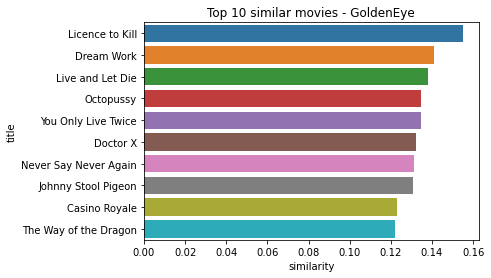

In [274]:
sns.barplot(x="similarity", y="title", data=GE_sim)
plt.title("Top 10 similar movies - GoldenEye")

In [275]:
TS = sim_data[sim_data["belongs_to_collection"]=="Toy Story Collection"]
TS["title"]

0          Toy Story
2997     Toy Story 2
15348    Toy Story 3
Name: title, dtype: object

In [276]:
get_recommendations("Toy Story")

(15348                                     Toy Story 3
 2997                                      Toy Story 2
 10301                          The 40 Year Old Virgin
 24523                                       Small Fry
 23843                     Andy Hardy's Blonde Trouble
 29202                                      Hot Splash
 43427                Andy Kaufman Plays Carnegie Hall
 38476    Superstar: The Life and Times of Andy Warhol
 42721    Andy Peters: Exclamation Mark Question Point
 8327                                        The Champ
 Name: title, dtype: object,
 [0.5317249390108459,
  0.4718643328120839,
  0.2749594871030276,
  0.27298697340301753,
  0.23537059350801215,
  0.22376140634350095,
  0.21760587671568432,
  0.21591232086538942,
  0.20188419113977984,
  0.19878141357655565])

In [277]:
TS_sim = pd.DataFrame()
TS_sim["title"] = get_recommendations("Toy Story")[0]
TS_sim["similarity"] = get_recommendations("Toy Story")[1]

In [278]:
TS_sim

,title,similarity
15348,Toy Story 3,0.531725
2997,Toy Story 2,0.471864
10301,The 40 Year Old Virgin,0.274959
24523,Small Fry,0.272987
23843,Andy Hardy's Blonde Trouble,0.235371
29202,Hot Splash,0.223761
43427,Andy Kaufman Plays Carnegie Hall,0.217606
38476,Superstar: The Life and Times of Andy Warhol,0.215912
42721,Andy Peters: Exclamation Mark Question Point,0.201884
8327,The Champ,0.198781


Text(0.5, 1.0, 'Top 10 similar movies - Toy Story')

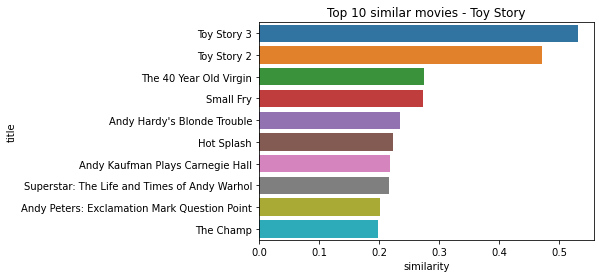

In [279]:
sns.barplot(x="similarity", y="title", data=TS_sim)
plt.title("Top 10 similar movies - Toy Story")

In [280]:
SH = sim_data[sim_data["belongs_to_collection"]=="Sherlock Holmes (1939 series)"]
SH["title"]

6772     Sherlock Holmes and the Voice of Terror
6773                 Sherlock Holmes Faces Death
6774               Sherlock Holmes in Washington
7754           The Adventures of Sherlock Holmes
7757               The Hound of the Baskervilles
8044                             Terror by Night
8046       Sherlock Holmes and the Secret Weapon
8047                          The Woman in Green
8051                             Dressed to Kill
14993                         The Pearl of Death
27790                         Pursuit to Algiers
37766                          The House of Fear
Name: title, dtype: object

In [281]:
get_recommendations("Sherlock Holmes and the Voice of Terror")

(4434                                        Without a Clue
 3166                                  They Might Be Giants
 34730    The Adventures of Sherlock Holmes and Doctor W...
 9743                           The Seven-Per-Cent Solution
 6432                   The Private Life of Sherlock Holmes
 33568                                Home for the Holidays
 34750    The Adventures of Sherlock Holmes and Doctor W...
 28505               Sherlock Holmes and the Masks of Death
 2301                                 Young Sherlock Holmes
 24665     The Sign of Four: Sherlock Holmes' Greatest Case
 Name: title, dtype: object,
 [0.22662624507146747,
  0.22462790337758284,
  0.20922822208712186,
  0.19851462941672274,
  0.1959147305412208,
  0.19476857300122327,
  0.17074586150747567,
  0.17027983221710133,
  0.16862713947213648,
  0.16226658153003773])

In [282]:
SH_sim = pd.DataFrame()
SH_sim["title"] = get_recommendations("Sherlock Holmes and the Voice of Terror")[0]
SH_sim["similarity"] = get_recommendations("Sherlock Holmes and the Voice of Terror")[1]

In [283]:
SH_sim

,title,similarity
4434,Without a Clue,0.226626
3166,They Might Be Giants,0.224628
34730,The Adventures of Sherlock Holmes and Doctor W...,0.209228
9743,The Seven-Per-Cent Solution,0.198515
6432,The Private Life of Sherlock Holmes,0.195915
33568,Home for the Holidays,0.194769
34750,The Adventures of Sherlock Holmes and Doctor W...,0.170746
28505,Sherlock Holmes and the Masks of Death,0.170280
2301,Young Sherlock Holmes,0.168627
24665,The Sign of Four: Sherlock Holmes' Greatest Case,0.162267


Text(0.5, 1.0, 'Top 10 similar movies - Sherlock Holmes')

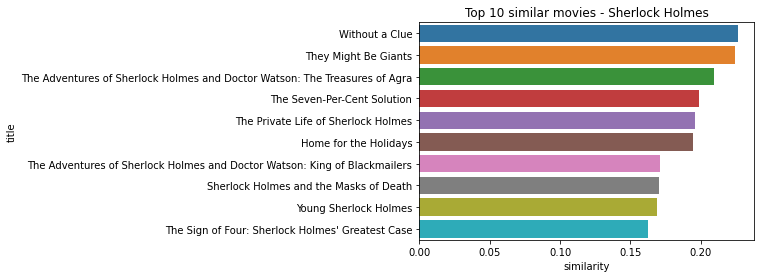

In [284]:
sns.barplot(x="similarity", y="title", data=SH_sim)
plt.title("Top 10 similar movies - Sherlock Holmes")

# cast, director, genres의 유사도를 이용한 유사한 영화 추천

In [285]:
data2 = pd.read_csv("D:/ESAA/project/data/credits.csv")

In [286]:
data2.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [287]:
data2["cast"][0]

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

In [ ]:
data2["crew"][0][0:10]

casting된 배우(성우)의 이름과 director의 이름만 뽑아서 기존 data에 id가 같은 행에 추가

In [289]:
features = ['cast', 'crew']
for feature in features:
    data2[feature] = data2[feature].apply(eval)

In [290]:
data2["cast"][0][0]

{'cast_id': 14,
 'character': 'Woody (voice)',
 'credit_id': '52fe4284c3a36847f8024f95',
 'gender': 2,
 'id': 31,
 'name': 'Tom Hanks',
 'order': 0,
 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}

In [291]:
data2["crew"][0][0:10]

[{'credit_id': '52fe4284c3a36847f8024f49',
  'department': 'Directing',
  'gender': 2,
  'id': 7879,
  'job': 'Director',
  'name': 'John Lasseter',
  'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f4f',
  'department': 'Writing',
  'gender': 2,
  'id': 12891,
  'job': 'Screenplay',
  'name': 'Joss Whedon',
  'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f55',
  'department': 'Writing',
  'gender': 2,
  'id': 7,
  'job': 'Screenplay',
  'name': 'Andrew Stanton',
  'profile_path': '/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f5b',
  'department': 'Writing',
  'gender': 2,
  'id': 12892,
  'job': 'Screenplay',
  'name': 'Joel Cohen',
  'profile_path': '/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f61',
  'department': 'Writing',
  'gender': 0,
  'id': 12893,
  'job': 'Screenplay',
  'name': 'Alec Sokolow',
  'profile_path': '/v79vlRYi94BZUQnkkyzn

In [292]:
def get_name(data):
    name_list=[]
    for l in data:
        name=[]
        for d in l:
            name.append(d["name"])
        name_list.append(name)
    return name_list

In [293]:
def get_dir(data):
    director_list=[]
    for l in data:
        director=[]
        for d in l:
            if d["job"]=="Director":
                director.append(d["name"])
            else:
                pass
        director_list.append(director)
    return director_list

In [294]:
data2["cast"] = get_name(data2["cast"])
data2["crew"] = get_dir(data2["crew"])

In [295]:
data2

,cast,crew,id
0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[John Lasseter],862
1,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",[Joe Johnston],8844
2,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",[Howard Deutch],15602
3,"[Whitney Houston, Angela Bassett, Loretta Devi...",[Forest Whitaker],31357
4,"[Steve Martin, Diane Keaton, Martin Short, Kim...",[Charles Shyer],11862
...,...,...,...
45471,"[Leila Hatami, Kourosh Tahami, Elham Korda]",[Hamid Nematollah],439050
45472,"[Angel Aquino, Perry Dizon, Hazel Orencio, Joe...",[Lav Diaz],111109
45473,"[Erika Eleniak, Adam Baldwin, Julie du Page, J...",[Mark L. Lester],67758
45474,"[Iwan Mosschuchin, Nathalie Lissenko, Pavel Pa...",[Yakov Protazanov],227506


In [296]:
data2 = data2.merge(data, on="id")

In [297]:
data2 

,cast,crew,id,adult,belongs_to_collection,budget,genres,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[John Lasseter],862,False,Toy Story Collection,30000000.0,"[Animation, Comedy, Family]",en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,[English],Released,NaN,Toy Story,False,7.7,5415.0
1,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",[Joe Johnston],8844,False,NaN,65000000.0,"[Adventure, Fantasy, Family]",en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",[Howard Deutch],15602,False,Grumpy Old Men Collection,0.0,"[Romance, Comedy]",en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,[English],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,"[Whitney Houston, Angela Bassett, Loretta Devi...",[Forest Whitaker],31357,False,NaN,16000000.0,"[Comedy, Drama, Romance]",en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,[English],Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,"[Steve Martin, Diane Keaton, Martin Short, Kim...",[Charles Shyer],11862,False,Father of the Bride Collection,0.0,[Comedy],en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,[English],Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45336,"[Patrick Bergin, Uma Thurman, David Morrissey,...",[John Irvin],30840,False,NaN,0.0,"[Drama, Action, Romance]",en,Robin Hood,"Yet another version of the classic epic, with ...",...,1991-05-13,0.0,104.0,[English],Released,NaN,Robin Hood,False,5.7,26.0
45337,"[Leila Hatami, Kourosh Tahami, Elham Korda]",[Hamid Nematollah],439050,False,NaN,0.0,"[Drama, Family]",fa,رگ خواب,Rising and falling between a man and woman.,...,NaT,0.0,90.0,[فارسی],Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45338,"[Erika Eleniak, Adam Baldwin, Julie du Page, J...",[Mark L. Lester],67758,False,NaN,0.0,"[Action, Drama, Thriller]",en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,[English],Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45339,"[Iwan Mosschuchin, Nathalie Lissenko, Pavel Pa...",[Yakov Protazanov],227506,False,NaN,0.0,NaN,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,NaN,Released,NaN,Satan Triumphant,False,0.0,0.0


In [298]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [299]:
features = ['cast', 'crew', 'genres']

for feature in features:
    data2[feature] = data2[feature].apply(clean_data)

In [300]:
data2

,cast,crew,id,adult,belongs_to_collection,budget,genres,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,"[tomhanks, timallen, donrickles, jimvarney, wa...",[johnlasseter],862,False,Toy Story Collection,30000000.0,"[animation, comedy, family]",en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,[English],Released,NaN,Toy Story,False,7.7,5415.0
1,"[robinwilliams, jonathanhyde, kirstendunst, br...",[joejohnston],8844,False,NaN,65000000.0,"[adventure, fantasy, family]",en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,"[waltermatthau, jacklemmon, ann-margret, sophi...",[howarddeutch],15602,False,Grumpy Old Men Collection,0.0,"[romance, comedy]",en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,[English],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,"[whitneyhouston, angelabassett, lorettadevine,...",[forestwhitaker],31357,False,NaN,16000000.0,"[comedy, drama, romance]",en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,[English],Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,"[stevemartin, dianekeaton, martinshort, kimber...",[charlesshyer],11862,False,Father of the Bride Collection,0.0,[comedy],en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,[English],Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45336,"[patrickbergin, umathurman, davidmorrissey, jü...",[johnirvin],30840,False,NaN,0.0,"[drama, action, romance]",en,Robin Hood,"Yet another version of the classic epic, with ...",...,1991-05-13,0.0,104.0,[English],Released,NaN,Robin Hood,False,5.7,26.0
45337,"[leilahatami, kouroshtahami, elhamkorda]",[hamidnematollah],439050,False,NaN,0.0,"[drama, family]",fa,رگ خواب,Rising and falling between a man and woman.,...,NaT,0.0,90.0,[فارسی],Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45338,"[erikaeleniak, adambaldwin, juliedupage, james...",[markl.lester],67758,False,NaN,0.0,"[action, drama, thriller]",en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,[English],Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45339,"[iwanmosschuchin, nathalielissenko, pavelpavlo...",[yakovprotazanov],227506,False,NaN,0.0,,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,NaN,Released,NaN,Satan Triumphant,False,0.0,0.0


In [301]:
def create_rec_element(data_features):
    listtt=[]
    for row in data_features:
        listt=[]
        listt.append(" ".join(row))
        listtt.append(listt)
    return listtt

In [302]:
data2["cast"]=create_rec_element(data2["cast"])
data2["crew"]=create_rec_element(data2["crew"])
data2["genres"]=create_rec_element(data2["genres"])

In [303]:
data2

,cast,crew,id,adult,belongs_to_collection,budget,genres,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,[tomhanks timallen donrickles jimvarney wallac...,[johnlasseter],862,False,Toy Story Collection,30000000.0,[animation comedy family],en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,[English],Released,NaN,Toy Story,False,7.7,5415.0
1,[robinwilliams jonathanhyde kirstendunst bradl...,[joejohnston],8844,False,NaN,65000000.0,[adventure fantasy family],en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,[waltermatthau jacklemmon ann-margret sophialo...,[howarddeutch],15602,False,Grumpy Old Men Collection,0.0,[romance comedy],en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,[English],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,[whitneyhouston angelabassett lorettadevine le...,[forestwhitaker],31357,False,NaN,16000000.0,[comedy drama romance],en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,[English],Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,[stevemartin dianekeaton martinshort kimberlyw...,[charlesshyer],11862,False,Father of the Bride Collection,0.0,[comedy],en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,[English],Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45336,[patrickbergin umathurman davidmorrissey jürge...,[johnirvin],30840,False,NaN,0.0,[drama action romance],en,Robin Hood,"Yet another version of the classic epic, with ...",...,1991-05-13,0.0,104.0,[English],Released,NaN,Robin Hood,False,5.7,26.0
45337,[leilahatami kouroshtahami elhamkorda],[hamidnematollah],439050,False,NaN,0.0,[drama family],fa,رگ خواب,Rising and falling between a man and woman.,...,NaT,0.0,90.0,[فارسی],Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45338,[erikaeleniak adambaldwin juliedupage jamesrem...,[markl.lester],67758,False,NaN,0.0,[action drama thriller],en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,[English],Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45339,[iwanmosschuchin nathalielissenko pavelpavlov ...,[yakovprotazanov],227506,False,NaN,0.0,[],en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,NaN,Released,NaN,Satan Triumphant,False,0.0,0.0


In [304]:
def create_rec(x):       
    return ' '.join(x['cast']) + ' ' + ' '.join(x['crew']) 
data2['rec'] = data2.apply(create_rec, axis=1)

In [305]:
data2["rec"][10]

'michaeldouglas annettebening michaelj.fox martinsheen annadeaveresmith shawnawaldron samanthamathis davidpaymer richarddreyfuss ninasiemaszko wendiemalick beaubillingslea gailstrickland joshuamalina clementvonfranckenstein johnmahoney johnmahon gabrieljarret robreiner'

In [306]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

In [307]:
data2["rec"] = data2["rec"].fillna("")

In [308]:
feature_vect_simple = tfidf.fit_transform(data2["rec"])
feature_vect_simple.shape

(45341, 218784)

In [309]:
from sklearn.metrics.pairwise import cosine_similarity

In [310]:
sim_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)

MemoryError: Unable to allocate 15.3 GiB for an array with shape (45341, 45341) and data type float64

In [ ]:
data2 = data2.reset_index()
indices = pd.Series(data2.index, index=data2['title'])